need to install all these dependencies
pip/pip3 install keras
pip/pip3 install matplotlib
pip/pip3 install numpy
pip/pip3 install tensorflow

In [1]:
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
import matplotlib.pyplot as plot
import numpy as np
import random
import time


Using TensorFlow backend.


Import the mnist data set and ensure the data is shaped properly.
The original data is a (28, 28) pixel greyscale image. We need to flatten it for the network.
Need a 1 dimensional array for the input (784, ) and a 1 dimensional array for the output (10,) but we have 60,000 data points. So we end up with (60000, 784) and (60000, 10)

In [45]:
num_classes = 10
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [46]:
x_train[0].shape

(784,)

Just to show you what the data looks like

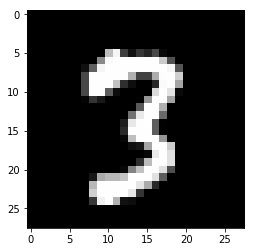

In [43]:
plot.imshow(random.choice(x_train).reshape(28, 28), cmap='gray')
plot.show()

We are using a fully connected feed forward neural network - "Sequential" makes it feed forward, "Dense" makes it fully connected.

We're using a relu (rectified linear units)[https://en.wikipedia.org/wiki/Rectifier_(neural_networks)] activation in the hidden layer - it's often recommended for hidden layers in image based problems - not sure why :P

We're using softmax in the final layer - it's similar to relu. For some reason, if you replace softmax with relu then the loss will be nan most of the time - not sure why

Categorical Crossentropy [https://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/] is used as the loss function. I think it's the de-facto loss function for categorisation problems. MSE is used in linear regression but is not suitable for categorisation

The optimizer is RMSProp - Stochastic Gradient Descent caused problems for some reason

Accuracy is added as a metric - it is simply the percentage of the training set that it guesses correctly. A random guesser we would expect to get 0.1 accuracy. A human, close to 1 accuracy

In [17]:
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=x_train.shape[1:]))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy",
              optimizer="RMSProp",
             metrics=["accuracy"])

In [18]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 15s 246us/step - loss: 9.7175 - acc: 0.3947
Epoch 2/10
60000/60000 [==============================] - 7s 116us/step - loss: 8.6656 - acc: 0.4605
Epoch 3/10
60000/60000 [==============================] - 6s 102us/step - loss: 7.6207 - acc: 0.5255
Epoch 4/10
60000/60000 [==============================] - 6s 104us/step - loss: 7.0849 - acc: 0.5592 4s - loss: 7.1746 
Epoch 5/10
60000/60000 [==============================] - 8s 127us/step - loss: 7.0061 - acc: 0.5644
Epoch 6/10
60000/60000 [==============================] - 8s 130us/step - loss: 6.9308 - acc: 0.5691 0s - loss: 6.9467 - a
Epoch 7/10
60000/60000 [==============================] - 6s 104us/step - loss: 6.9263 - acc: 0.5693
Epoch 8/10
60000/60000 [==============================] - 7s 113us/step - loss: 6.8863 - acc: 0.5720
Epoch 9/10
60000/60000 [==============================] - 13s 220us/step - loss: 6.8769 - acc: 0.5727
Epoch 10/10
60000/60000 [=======================

We evaluate the model against test data. If the accuracy and loss here are dramatically different to the training data, then we know that our model has overfitted to the training data and will not be useful in real world applications

In [19]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 58us/step


[6.9778738250732424, 0.56569999999999998]

This is just a demonstration of the predictive abilities of the trained network - highlight it and hit ctrl+enter to run it against a new random member from the data set

Prediction:  4
--------------


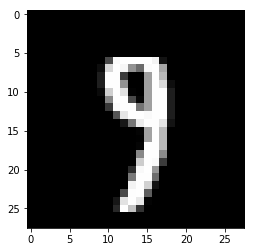

In [28]:
random_mnist_character = random.choice(x_train)
result = np.argmax(model.predict(np.array([random_mnist_character])))
print("Prediction: ", result)
print("--------------")

plot.imshow(random_mnist_character.reshape(28,28), cmap='gray')
plot.show()

Here is a bunch of quick comparisons of different optimizers. Lower loss, higher accuracy is better.

In [35]:
# Root Mean Square Propagation
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=x_train.shape[1:]))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy",
              optimizer="RMSProp",
             metrics=["accuracy"])

model.fit(x_train, y_train, epochs=10)

result = model.evaluate(x_test, y_test)
print("loss: ", result[0])
print("accuracy: ", result[1])

Epoch 1/10
60000/60000 [==============================] - 10s 172us/step - loss: 7.6771 - acc: 0.5204
Epoch 2/10
60000/60000 [==============================] - 9s 147us/step - loss: 6.2344 - acc: 0.6113
Epoch 3/10
60000/60000 [==============================] - 11s 175us/step - loss: 5.5187 - acc: 0.6557
Epoch 4/10
60000/60000 [==============================] - 9s 147us/step - loss: 4.2440 - acc: 0.7344
Epoch 5/10
60000/60000 [==============================] - 14s 235us/step - loss: 4.1112 - acc: 0.7430
Epoch 6/10
60000/60000 [==============================] - 12s 202us/step - loss: 3.5934 - acc: 0.7748
Epoch 7/10
60000/60000 [==============================] - 15s 252us/step - loss: 2.8359 - acc: 0.8212
Epoch 8/10
60000/60000 [==============================] - 15s 256us/step - loss: 2.6369 - acc: 0.8344
Epoch 9/10
60000/60000 [==============================] - 14s 236us/step - loss: 2.6373 - acc: 0.8347
Epoch 10/10
10000/10000 [==============================] - 2s 153us/step
loss:  2.59

In [33]:
# Stochastic Gradient Descent
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=x_train.shape[1:]))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
             metrics=["accuracy"])

model.fit(x_train, y_train, epochs=10)

result = model.evaluate(x_test, y_test)
print("loss: ", result[0])
print("accuracy: ", result[1])

Epoch 1/10
60000/60000 [==============================] - 16s 264us/step - loss: 14.5148 - acc: 0.0995
Epoch 2/10
60000/60000 [==============================] - 14s 230us/step - loss: 14.5176 - acc: 0.0993
Epoch 3/10
60000/60000 [==============================] - 13s 215us/step - loss: 14.5176 - acc: 0.0993
Epoch 4/10
60000/60000 [==============================] - 12s 201us/step - loss: 14.5176 - acc: 0.0993
Epoch 5/10
60000/60000 [==============================] - 14s 232us/step - loss: 14.5176 - acc: 0.0993
Epoch 6/10
60000/60000 [==============================] - 13s 209us/step - loss: 14.5176 - acc: 0.0993
Epoch 7/10
60000/60000 [==============================] - 14s 233us/step - loss: 14.5176 - acc: 0.0993
Epoch 8/10
60000/60000 [==============================] - 13s 214us/step - loss: 14.5176 - acc: 0.0993
Epoch 9/10
60000/60000 [==============================] - 15s 245us/step - loss: 14.5176 - acc: 0.0993
Epoch 10/10
10000/10000 [==============================] - 1s 145us/step


In [44]:
# Adaptive Moment Estimation
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=x_train.shape[1:]))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
             metrics=["accuracy"])

model.fit(x_train, y_train, epochs=10)

result = model.evaluate(x_test, y_test)
print("loss: ", result[0])
print("accuracy: ", result[1])

Epoch 1/10
60000/60000 [==============================] - 10s 166us/step - loss: 10.6221 - acc: 0.3398
Epoch 2/10
60000/60000 [==============================] - 8s 128us/step - loss: 10.2030 - acc: 0.3664
Epoch 3/10
60000/60000 [==============================] - 7s 123us/step - loss: 10.1498 - acc: 0.3698
Epoch 4/10
60000/60000 [==============================] - 7s 115us/step - loss: 10.0202 - acc: 0.3780
Epoch 5/10
60000/60000 [==============================] - 8s 133us/step - loss: 9.9873 - acc: 0.3801
Epoch 6/10
60000/60000 [==============================] - 8s 132us/step - loss: 10.0039 - acc: 0.3791
Epoch 7/10
60000/60000 [==============================] - 7s 123us/step - loss: 9.9767 - acc: 0.3808
Epoch 8/10
60000/60000 [==============================] - 10s 165us/step - loss: 9.9871 - acc: 0.3802
Epoch 9/10
60000/60000 [==============================] - 9s 145us/step - loss: 9.9852 - acc: 0.3804
Epoch 10/10
10000/10000 [==============================] - 0s 45us/step
loss:  10.12

In [37]:
# Root Mean Square Propagation with mean squared error
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=x_train.shape[1:]))
model.add(Dense(10, activation="softmax"))
model.compile(loss="mean_squared_error",
              optimizer="RMSProp",
             metrics=["accuracy"])

model.fit(x_train, y_train, epochs=10)

result = model.evaluate(x_test, y_test)
print("loss: ", result[0])
print("accuracy: ", result[1])

Epoch 1/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.1658 - acc: 0.1705
Epoch 2/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.1626 - acc: 0.1868
Epoch 3/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.1612 - acc: 0.1933
Epoch 4/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.1551 - acc: 0.2243
Epoch 5/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.1496 - acc: 0.2518
Epoch 6/10
60000/60000 [==============================] - 15s 247us/step - loss: 0.1503 - acc: 0.2482
Epoch 7/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.1491 - acc: 0.2544
Epoch 8/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.1467 - acc: 0.2661
Epoch 9/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.1471 - acc: 0.2643
Epoch 10/10
10000/10000 [==============================] - 2s 237us/step
loss:  0.145

In [38]:
# Stochastic Gradient Descent with mean squared error
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=x_train.shape[1:]))
model.add(Dense(10, activation="softmax"))
model.compile(loss="mean_squared_error",
              optimizer="sgd",
             metrics=["accuracy"])

model.fit(x_train, y_train, epochs=10)

result = model.evaluate(x_test, y_test)
print("loss: ", result[0])
print("accuracy: ", result[1])

Epoch 1/10
60000/60000 [==============================] - 10s 166us/step - loss: 0.1366 - acc: 0.3119
Epoch 2/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.1144 - acc: 0.4250
Epoch 3/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.1110 - acc: 0.4423
Epoch 4/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.1108 - acc: 0.4434
Epoch 5/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.1092 - acc: 0.4517
Epoch 6/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.0993 - acc: 0.5005
Epoch 7/10
60000/60000 [==============================] - 14s 230us/step - loss: 0.0934 - acc: 0.5305
Epoch 8/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0932 - acc: 0.5319
Epoch 9/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.0919 - acc: 0.5384
Epoch 10/10
10000/10000 [==============================] - 1s 117us/step
loss:  0.092622

In [39]:
# Adaptive Moment Estimation with mean squared error
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=x_train.shape[1:]))
model.add(Dense(10, activation="softmax"))
model.compile(loss="mean_squared_error",
              optimizer="Adam",
             metrics=["accuracy"])

model.fit(x_train, y_train, epochs=10)

result = model.evaluate(x_test, y_test)
print("loss: ", result[0])
print("accuracy: ", result[1])

Epoch 1/10
60000/60000 [==============================] - 11s 181us/step - loss: 0.1492 - acc: 0.2533
Epoch 2/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.1459 - acc: 0.2703
Epoch 3/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.1441 - acc: 0.2792
Epoch 4/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.1444 - acc: 0.2776
Epoch 5/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.1425 - acc: 0.28720s - loss: 0.142
Epoch 6/10
60000/60000 [==============================] - 13s 224us/step - loss: 0.1426 - acc: 0.2871
Epoch 7/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.1357 - acc: 0.3215
Epoch 8/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.1279 - acc: 0.3605
Epoch 9/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.1262 - acc: 0.3687
Epoch 10/10
10000/10000 [==============================] - 0s 42us/step